In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from mpl_toolkits import mplot3d

In [2]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2021-11-10 11:13:13.312522: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-10 11:13:13.344648: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 11:13:13.404827: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 11:13:13.405206: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [3]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Djuna_Data_Generation_Notebook/noshift1.csv',header = None))
train_x, train_y = cf.data_normaliser(df_pions[:-1000,:8]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:8]), df_pions[-1000:,-1]

In [4]:
opt = keras.optimizers.Adam(learning_rate= 0.005, beta_1 = 0.881, beta_2= 0.99)

In [5]:
def batch_size_tester(batch_size_range,step = 2,repeats = 5,section = 50000):
    batch_size_min, batch_size_max = batch_size_range
    batch_size_max = batch_size_max+1 ##Indexing trick so that the last batch size value is included 
    batch_sizes = np.arange(batch_size_min,batch_size_max,step = step)
    min_mape = np.zeros((len(batch_sizes),repeats))
    for i,_ in enumerate(batch_sizes):
        print('Batch Size ',batch_sizes[i])
        for j in range(repeats):
            mape_df = cf.trained_network(train_x[:section],train_y[:section],val_x,val_y,26*np.ones(5), optimizer= opt, verbose= 0,batch_size = batch_sizes[i]).history['mean_absolute_percentage_error']
            min_mape[i,j] = np.min(mape_df)
    return min_mape, batch_sizes

In [11]:
min_mape, batch_sizes = batch_size_tester((52,88),step = 4)

Batch Size  52
Batch Size  56
Batch Size  60
Batch Size  64
Batch Size  68
Batch Size  72
Batch Size  76
Batch Size  80
Batch Size  84
Batch Size  88


In [14]:
mean_min_mape = np.mean(min_mape,axis= 1)
std_min_mape = np.std(min_mape,axis= 1)
mse = std_min_mape/min_mape.shape[1]**0.5

Text(0, 0.5, 'Mean Minimum MAPE')

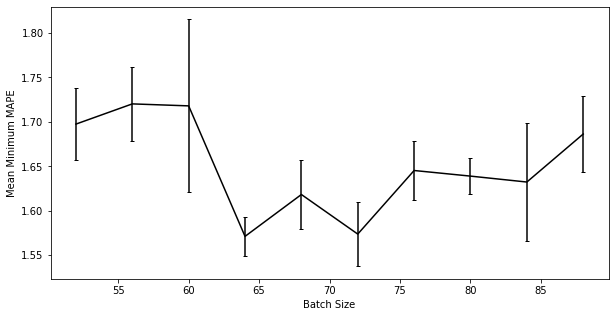

In [21]:
fig = plt.figure(figsize= (10,5))
plt.errorbar(batch_sizes,mean_min_mape,mse,color = 'black',capsize= 2)
plt.xlabel('Batch Size')
plt.ylabel('Mean Minimum MAPE')


In [22]:
fig.savefig('../Figures/Batch_size.png',dpi = 300)